# Rapport de suivi d'avancement:

**Exécution du bloc ci-dessous obligatoire**

In [1]:
import findspark
from pyspark.sql import SparkSession
import pyspark
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pyspark.sql import functions as F
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm
#from pandas.plotting import register 
#register_matplotlibmaters_conplers_conplers_conplers_conplats_conplers_conplers_conplats_conplats_convers
%matplotlib nbagg



findspark.init()
%matplotlib notebook

sc = pyspark.SparkContext(appName="Pi")
spark = SparkSession.builder.appName("SimpleApp").getOrCreate()


data = spark.read.csv("data.csv", header=True, sep=",")

Py4JError: org.apache.spark.api.python.PythonUtils.getEncryptionEnabled does not exist in the JVM

## I- Débruitage:

### 1- Ecart Interquartile (Box Plot)

In [4]:
data1 = data

In [5]:
x1 = data1.toPandas()["NO2"].values.tolist()
x2 = data1.toPandas()["PM10"].values.tolist()
x3 = data1.toPandas()["PM2.5"].values.tolist()
x4 = data1.toPandas()["PM1.0"].values.tolist()
x5 = data1.toPandas()["BC"].values.tolist()


In [6]:
def toNaN(x):
    for i in range(0,len(x)):
        if (i == 0):
            x[i] = 0
        if (x[i] == "NULL"):
            x[i] = np.nan
    return x

def toSTR(x):
    for i in range(0,len(x)):
        x[i] = round(x[i],1)
    return x


def toInt(x):
    for i in range(0,len(x)):
        if (x[i] == "NULL"):
            x[i] = 0
        else:
            x[i] = int(x[i])
    return x

def noiseDetector(L,limSup):
    res = []
    for i in L:
        if i > limSup:
            res.append(i)
            
    return res

#### a) NO2:

59972
52007


<IPython.core.display.Javascript object>


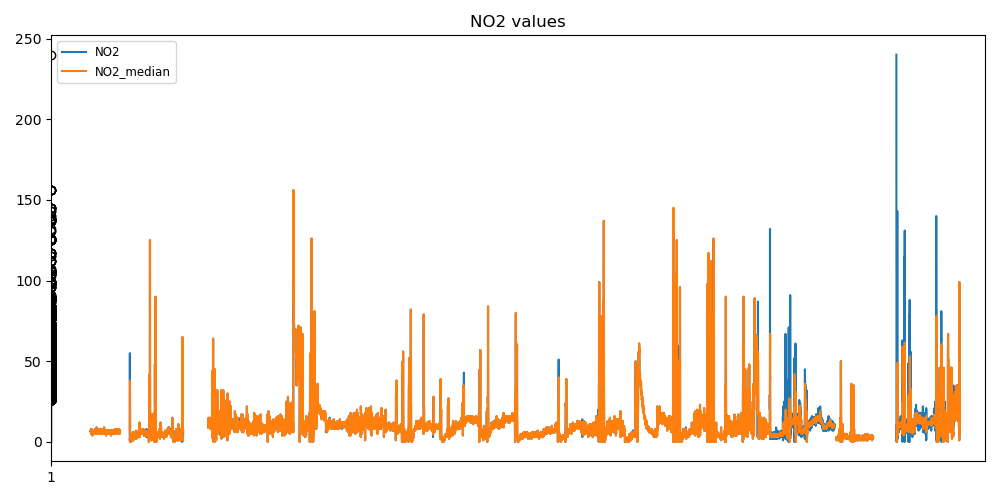

{'whiskers': [<matplotlib.lines.Line2D at 0x7f442d0c7dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f442d0c7978>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f442d0c7e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f442d0c4dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f442d0c4f60>],
 'means': []}

In [7]:
#z = toInt(x)
print(len(x1))
z = map(lambda a:a,filter(lambda a:a != 'NULL', x1))
z = toInt(list(z))
print(len(z))
#print(z)
#plt.size(200)
plt.figure(figsize=(10,10))
plt.boxplot(list(z), widths = 0.6, patch_artist = True)

#### b) PM10:

59972
11429


<IPython.core.display.Javascript object>


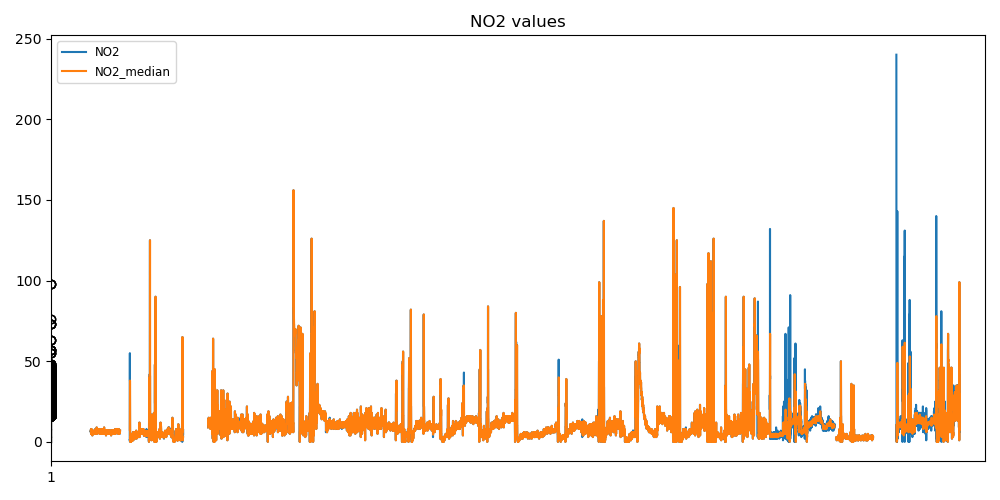

{'whiskers': [<matplotlib.lines.Line2D at 0x7f442d130518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f442d130048>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f442d130940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f442d136da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f442d136e48>],
 'means': []}

In [8]:
print(len(x2))
z1 = map(lambda a:a,filter(lambda a:a != 'NULL', x2))
z1 = toInt(list(z1))
print(len(z1))
#plt.size(200)
plt.figure(figsize=(10,10))
plt.boxplot(z1, widths = 0.6, patch_artist = True)

#### c) PM2.5

59972
11429


<IPython.core.display.Javascript object>


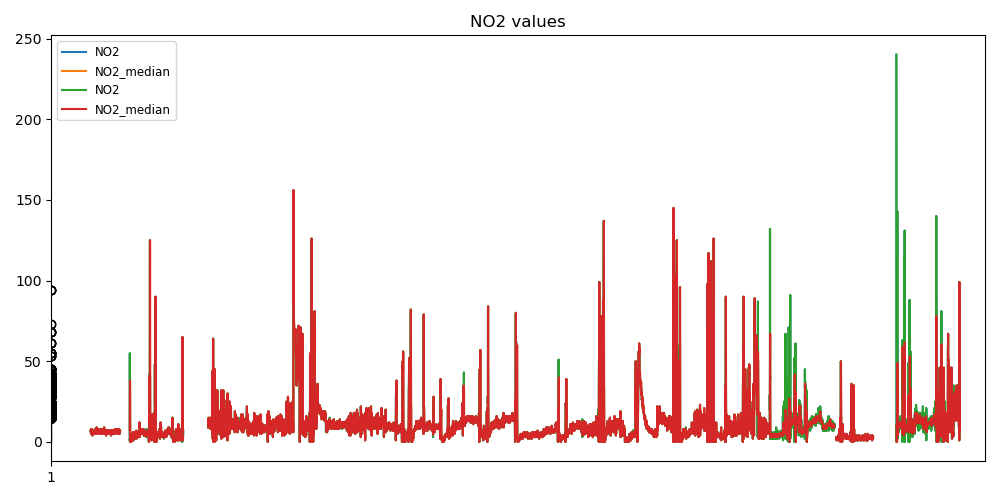

{'whiskers': [<matplotlib.lines.Line2D at 0x7f442d11bda0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f442d11bcf8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f442d11b320>],
 'medians': [<matplotlib.lines.Line2D at 0x7f442d119e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f442d119da0>],
 'means': []}

In [9]:
print(len(x3))
z2 = map(lambda a:a,filter(lambda a:a != 'NULL', x3))
z2 = toInt(list(z2))
print(len(z2))
#plt.size(200)
plt.figure(figsize=(10,10))
plt.boxplot(z2, widths = 0.6, patch_artist = True)

#### d) PM1.0

59972
11429


<IPython.core.display.Javascript object>


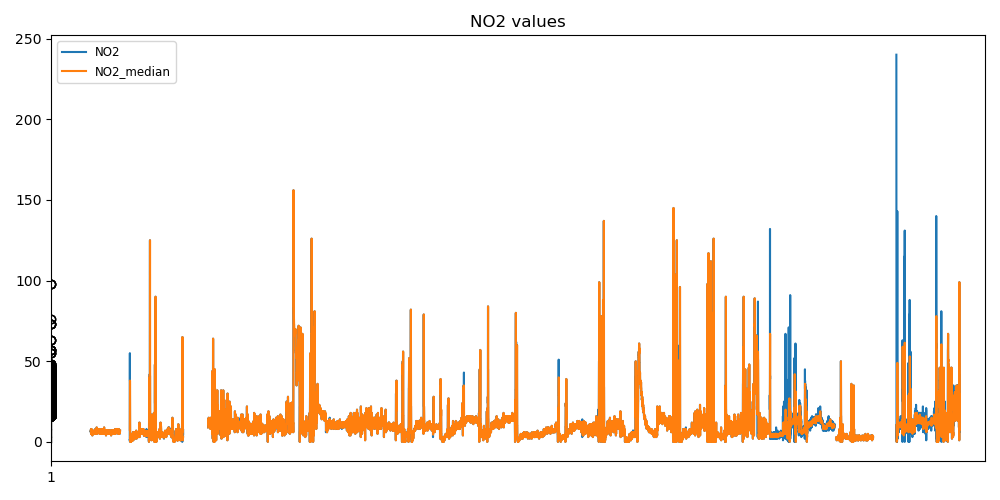

{'whiskers': [<matplotlib.lines.Line2D at 0x7f442d106438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f442d106cc0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f442d106860>],
 'medians': [<matplotlib.lines.Line2D at 0x7f442d104048>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f442d104390>],
 'means': []}

In [10]:
print(len(x4))
z3 = map(lambda a:a,filter(lambda a:a != 'NULL', x4))
z3 = toInt(list(z3))
print(len(z3))
#plt.size(200)
plt.figure(figsize=(10,10))
plt.boxplot(z3, widths = 0.6, patch_artist = True)

#### e) BC

59972
17631


<IPython.core.display.Javascript object>


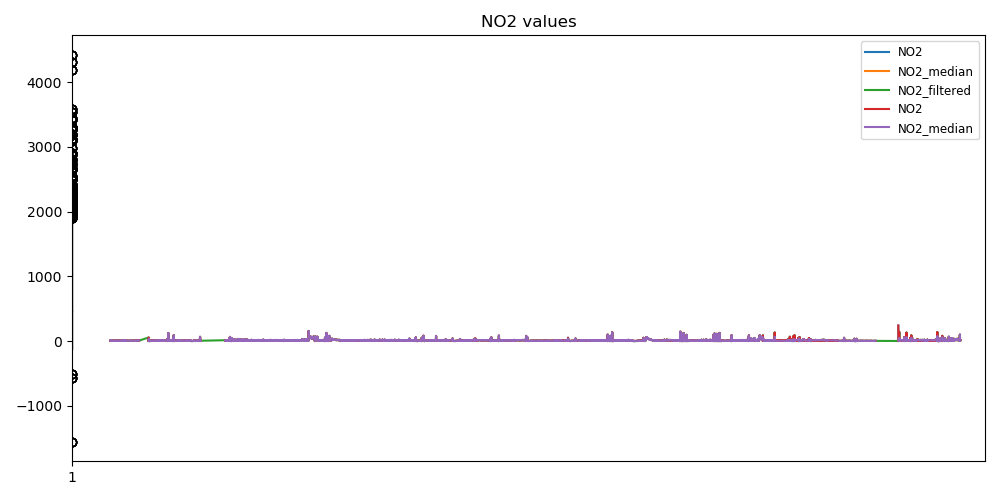

{'whiskers': [<matplotlib.lines.Line2D at 0x7f442d170470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f442d170160>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f442d173898>],
 'medians': [<matplotlib.lines.Line2D at 0x7f442d170a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f442d16f7b8>],
 'means': []}

In [11]:
print(len(x5))
z4 = map(lambda a:a,filter(lambda a:a != 'NULL', x5))
z4 = toInt(list(z4))
print(len(z4))
#plt.size(200)
plt.figure(figsize=(10,10))
plt.boxplot(z4, widths = 0.6, patch_artist = True)

#### f) Résumé des indicateurs dans l'ordre

<IPython.core.display.Javascript object>


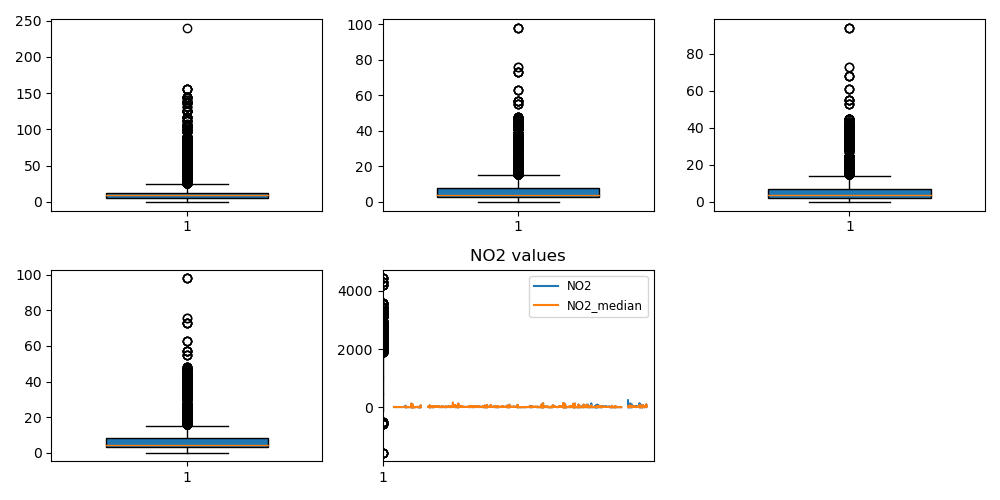

{'whiskers': [<matplotlib.lines.Line2D at 0x7f442d1a00b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f442d19ed30>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f442d1a04e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f442d19e0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f442d19e4a8>],
 'means': []}

In [12]:
fig = plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.boxplot(z, widths = 0.6, patch_artist = True)
plt.subplot(2, 3, 2)
plt.boxplot(z1, widths = 0.6, patch_artist = True)
plt.subplot(2, 3, 3)
plt.boxplot(z2, widths = 0.6, patch_artist = True)
plt.subplot(2, 3, 4)
plt.boxplot(z3, widths = 0.6, patch_artist = True)
plt.subplot(2, 3, 5)
plt.boxplot(z4, widths = 0.6, patch_artist = True)

In [34]:
plt.close()

*Conclusions:* On voit bien que les colonnes commençant par PM... ont à peu près la même répartition des données sauf la dernière colonne BC. 

### 2) Moving Average

### 3) Moving Median

In [13]:
df = pd.read_csv("data.csv")

#on définit win_len: c'est la taille de la fenêtre mouvante pour la méthode rolling_median_filter
#On choisit arbitrairement 10
win_len = 10

In [14]:
df

kit_id  participant_id                    time        lat       lon  \
0          80         9999964  2019-11-14 09:00:00+00  48.771777  2.006005   
1          80         9999964  2019-11-14 09:00:10+00  48.771777  2.006005   
2          80         9999964  2019-11-14 09:00:20+00  48.771777  2.006005   
3          80         9999964  2019-11-14 09:00:30+00  48.771777  2.006005   
4          80         9999964  2019-11-14 09:00:40+00  48.771777  2.006005   
...       ...             ...                     ...        ...       ...   
59967      88         9999920  2019-11-22 13:28:40+00  48.771798  2.005852   
59968      88         9999920  2019-11-22 13:29:30+00  48.771945  2.006148   
59969      88         9999920  2019-11-22 13:29:40+00  48.771963  2.006178   
59970      88         9999920  2019-11-22 13:29:50+00  48.771952  2.006107   
59971      88         9999920  2019-11-22 13:30:00+00  48.771960  2.006022   

       PM2.5  PM10  PM1.0  NO2  BC activity event  
0        NaN   NaN    NaN  NaN NaN      NaN   NaN  
1        NaN   NaN    NaN  NaN NaN      NaN   NaN  
2        NaN   NaN    NaN  NaN NaN      NaN   NaN  
3        NaN   NaN    NaN  NaN NaN      NaN   NaN  
4        NaN   NaN    NaN  NaN NaN      NaN   NaN  
...      ...   ...    ...  ...  ..      ...   ...  
59967    NaN   NaN    NaN  NaN NaN      NaN   NaN  
59968    NaN   NaN    NaN  NaN NaN      NaN   NaN  
59969    NaN   NaN    NaN  NaN NaN      NaN   NaN  
59970    NaN   NaN    NaN  NaN NaN      NaN   NaN  
59971    NaN   NaN    NaN  NaN NaN      NaN   NaN  

[59972 rows x 12 columns]

#### Rolling median filter sur NO2

In [31]:
#On travaille uniquement sur une concentration à la fois: dans cet exemple, la concentration de NO2.
df_NO2 = df[['time','NO2']]

<IPython.core.display.Javascript object>


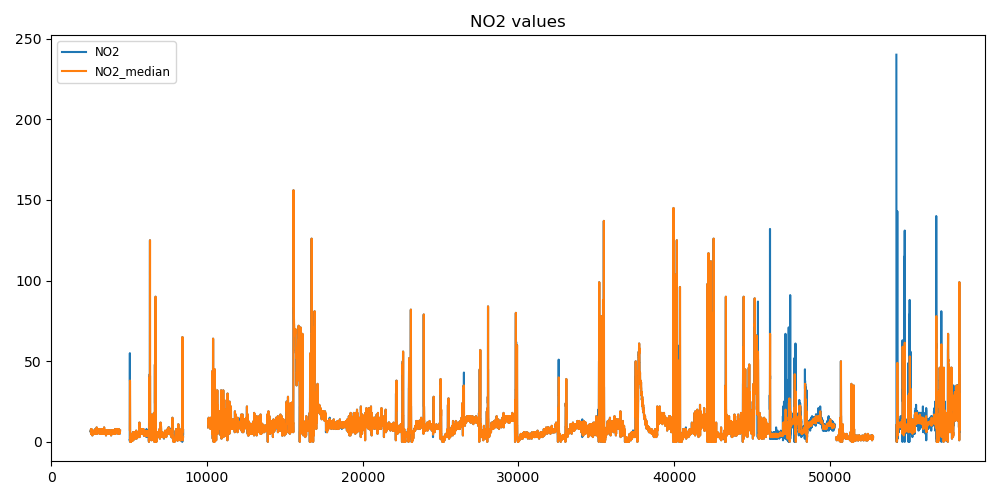

In [35]:
#On plot les valeurs brutes et les valeurs filtrées, c'est à dire la médiane sur une fenêtre mouvante de 10 unités
ax = df_NO2['NO2'].plot(figsize=(10, 5), title='NO2 values')

#Filtre: on utilise les méthodes .rolling() et .median() des dataframes pandas
df_NO2_roll = df_NO2.rolling(win_len).median()
df_NO2_roll.rename(columns={'NO2': 'NO2_median'}, inplace=True)
df_NO2_roll['NO2_median'].plot()


#On affiche le résultat
ax.legend(fontsize=8.5)
plt.tight_layout()
plt.show()


#Pour généraliser, on répète ce processus sur toutes les concentrations.
#Dans le cas de ce filtre, on remplace les valeurs par les médianes sur 10 unités de temps:
#cela permet d'éliminer les valeurs extrêmes mais transforme également les valeurs brutes.
#On pourrait modifier cela en mettant en place une comparaison entre la valeur brute et la valeur médiane.

In [36]:
#On ferme le plot pour pouvoir en ouvrir un nouveau dans la prochaine cellule
plt.close()

<IPython.core.display.Javascript object>


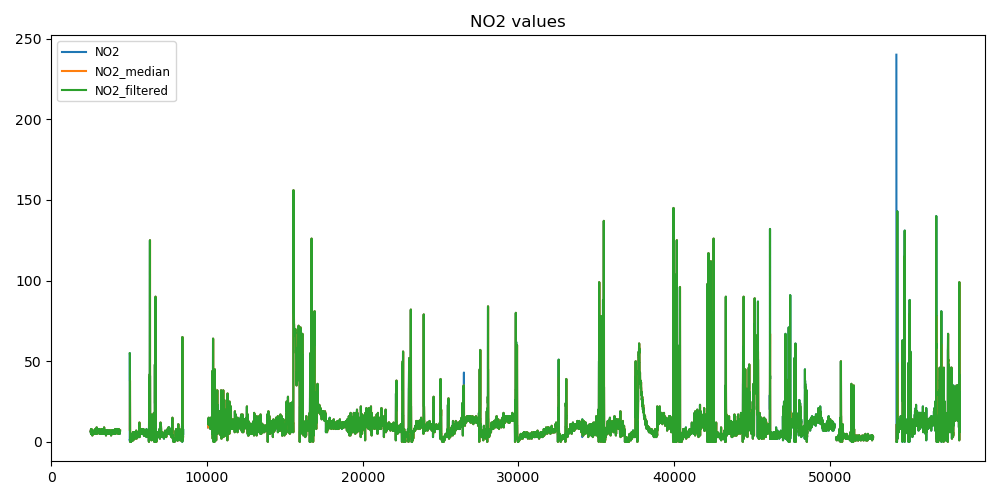

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [37]:
#On plot les valeurs brutes, les valeurs médianes et les valeurs filtrées.
#On commence par récupérer les valeurs précédentes.
axB = df_NO2['NO2'].plot(figsize=(10, 5), title='NO2 values')

df_NO2_roll['NO2_median'].plot()

#On récupère l'écart type sur la même fenêtre roulante dans df_NO2_std
df_NO2_std = df_NO2.rolling(win_len).std()

#On filtre: les valeurs s'éloignant trop de la médiane ne sont pas gardées
df_NO2_filtered = df_NO2[(df_NO2.NO2 <= df_NO2_roll.NO2_median + 3*df_NO2_std.NO2) & (df_NO2.NO2 >= df_NO2_roll.NO2_median - 3*df_NO2_std.NO2) | pd.isnull(df_NO2.NO2)]
df_NO2_filtered.rename(columns={'NO2': 'NO2_filtered'}, inplace=True)
df_NO2_filtered['NO2_filtered'].plot()

#On récupère les outliers et on les remplace par NaN
df_NO2_outliers = df_NO2[(df_NO2.NO2 > df_NO2_roll.NO2_median + 3*df_NO2_std.NO2) | (df_NO2.NO2 < df_NO2_roll.NO2_median - 3*df_NO2_std.NO2)]
df_NO2_outliers.rename(columns={'NO2': 'NO2_filtered'}, inplace=True)
df_NO2_outliers['NO2_filtered'] = np.nan

#On affiche le résultat
axB.legend(fontsize=8.5)
plt.tight_layout()
plt.show()

In [38]:
plt.close()

In [39]:
df_NO2.count()

time    59972
NO2     52007
dtype: int64

In [40]:
df_NO2_final = pd.concat([df_NO2_filtered, df_NO2_outliers])

In [41]:
df_NO2_final.count()

time            59918
NO2_filtered    50420
dtype: int64

In [42]:
df_NO2_final.to_csv(r'NO2_filtered.csv', encoding='utf8', index=False)

#### Rolling median filter sur PM10

In [43]:
df_PM10 = df[['time','PM10']]

<IPython.core.display.Javascript object>


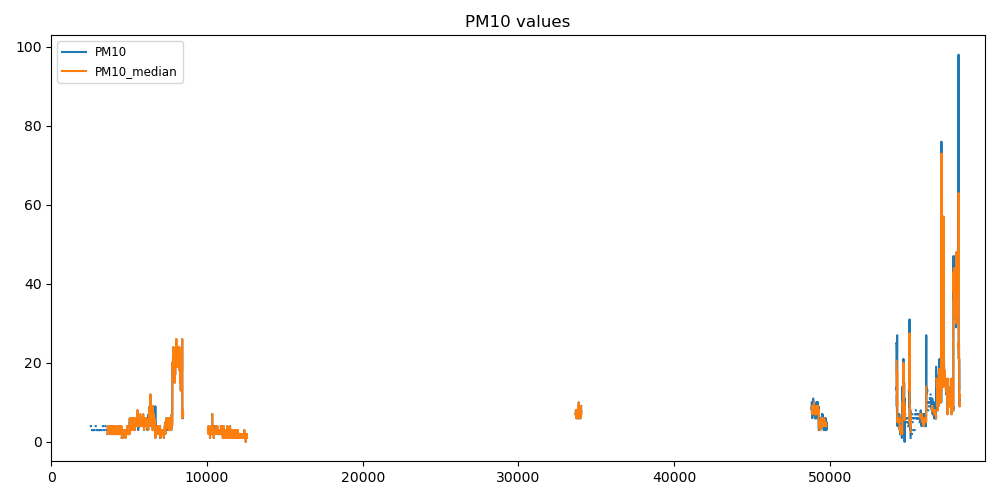

In [44]:
#On plot les valeurs brutes et les valeurs filtrées, c'est à dire la médiane sur une fenêtre mouvante de 10 unités
axPM10 = df_PM10['PM10'].plot(figsize=(10, 5), title='PM10 values')

#Filtre: on utilise les méthodes .rolling() et .median() des dataframes pandas
df_PM10_roll = df_PM10.rolling(win_len).median()
df_PM10_roll.rename(columns={'PM10': 'PM10_median'}, inplace=True)
df_PM10_roll['PM10_median'].plot()


#On affiche le résultat
axPM10.legend(fontsize=8.5)
plt.tight_layout()
plt.show()

In [45]:
#On ferme le plot pour pouvoir en ouvrir un nouveau dans la prochaine cellule
plt.close()

<IPython.core.display.Javascript object>


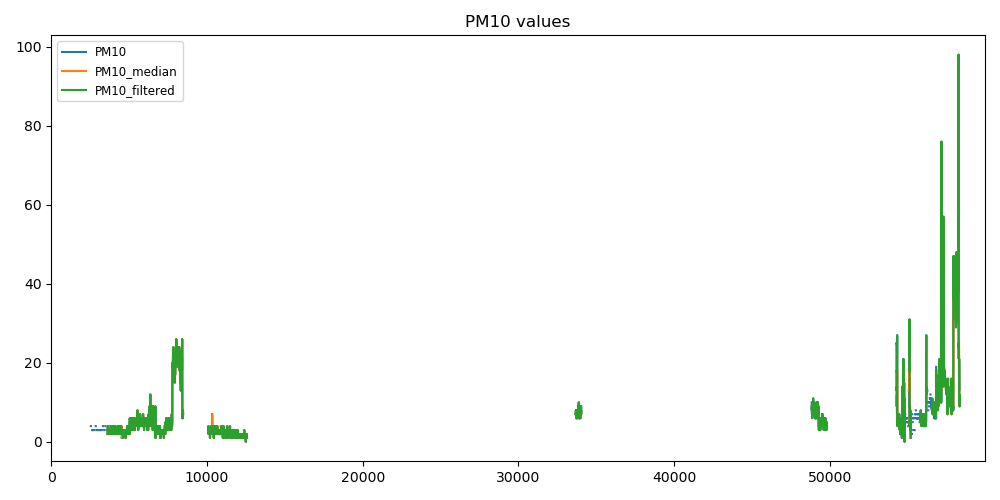

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [46]:
#On plot les valeurs brutes, les valeurs médianes et les valeurs filtrées.
#On commence par récupérer les valeurs précédentes.
axPM10B = df_PM10['PM10'].plot(figsize=(10, 5), title='PM10 values')

df_PM10_roll['PM10_median'].plot()

#On récupère l'écart type sur la même fenêtre roulante dans df_PM10_std
df_PM10_std = df_PM10.rolling(win_len).std()

#On filtre: les valeurs s'éloignant trop de la médiane ne sont pas gardées mais on garde les NaN pour une interpolation future
df_PM10_filtered = df_PM10[(df_PM10.PM10 <= df_PM10_roll.PM10_median + 3*df_PM10_std.PM10) & (df_PM10.PM10 >= df_PM10_roll.PM10_median - 3*df_PM10_std.PM10) | pd.isnull(df_PM10.PM10)]
df_PM10_filtered.rename(columns={'PM10': 'PM10_filtered'}, inplace=True)
df_PM10_filtered['PM10_filtered'].plot()

#On récupère les outliers et on les remplace par NaN
df_PM10_outliers = df_PM10[(df_PM10.PM10 > df_PM10_roll.PM10_median + 3*df_PM10_std.PM10) | (df_PM10.PM10 < df_PM10_roll.PM10_median - 3*df_PM10_std.PM10)]
df_PM10_outliers.rename(columns={'PM10': 'PM10_filtered'}, inplace=True)
df_PM10_outliers['PM10_filtered'] = np.nan

#On affiche le résultat
axPM10B.legend(fontsize=8.5)
plt.tight_layout()
plt.show()

In [47]:
plt.close()

In [48]:
df_PM10.count()

time    59972
PM10    11429
dtype: int64

In [49]:
df_PM10_final = pd.concat([df_PM10_filtered, df_PM10_outliers])

In [50]:
df_PM10_final.count()

time             59299
PM10_filtered    10395
dtype: int64

In [51]:
df_PM10_final.to_csv(r'PM10_filtered.csv', encoding='utf8', index=False)

#### Rolling median filter sur PM1.0

In [52]:
df_PM1 = df[['time','PM1.0']]

<IPython.core.display.Javascript object>


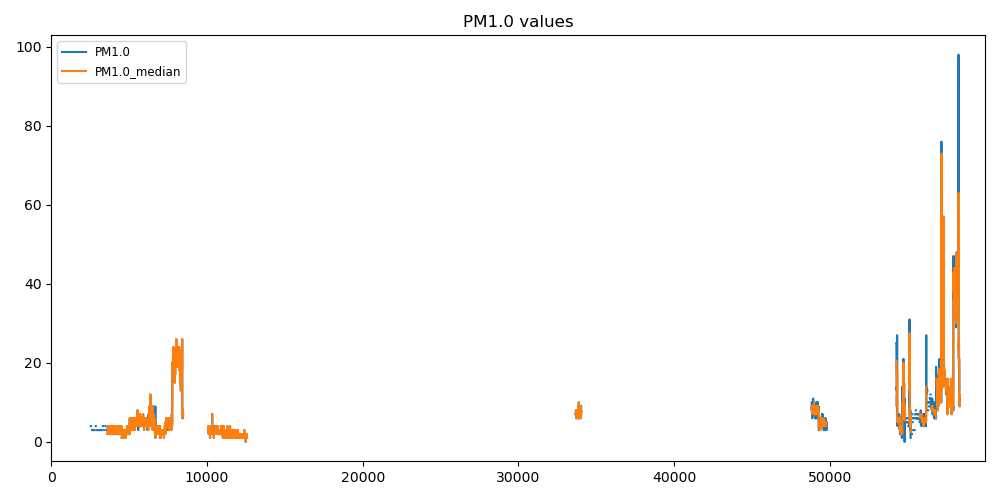

In [53]:
#On plot les valeurs brutes et les valeurs filtrées, c'est à dire la médiane sur une fenêtre mouvante de 10 unités
axPM1 = df_PM1['PM1.0'].plot(figsize=(10, 5), title='PM1.0 values')

#Filtre: on utilise les méthodes .rolling() et .median() des dataframes pandas
df_PM1_roll = df_PM1.rolling(win_len).median()
df_PM1_roll.rename(columns={'PM1.0': 'PM1.0_median'}, inplace=True)
df_PM1_roll['PM1.0_median'].plot()


#On affiche le résultat
axPM1.legend(fontsize=8.5)
plt.tight_layout()
plt.show()

In [54]:
plt.close()

<IPython.core.display.Javascript object>


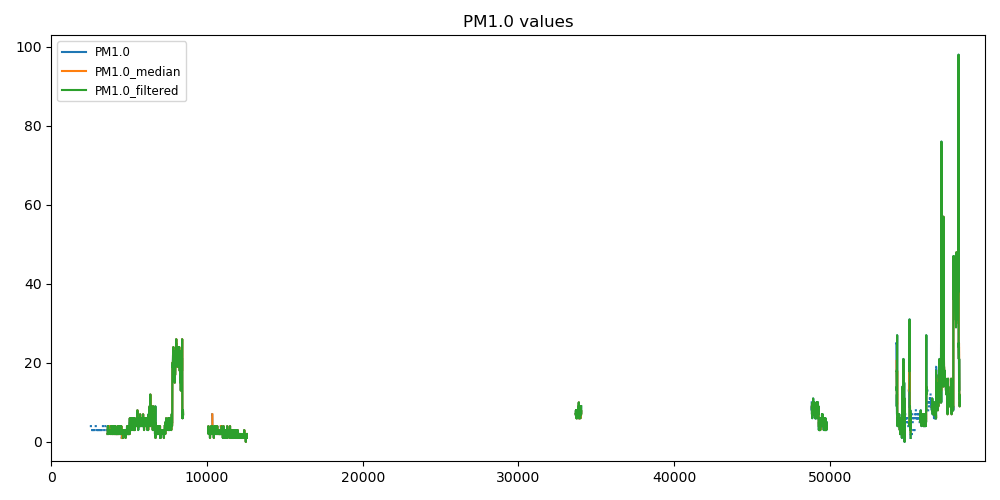

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [55]:
#On plot les valeurs brutes, les valeurs médianes et les valeurs filtrées.
#On commence par récupérer les valeurs précédentes.
axPM1B = df_PM1['PM1.0'].plot(figsize=(10, 5), title='PM1.0 values')

df_PM1_roll['PM1.0_median'].plot()

#On récupère l'écart type sur la même fenêtre roulante dans df_PM1_std
df_PM1_std = df_PM1.rolling(win_len).std()

#On filtre: les valeurs s'éloignant trop de la médiane ne sont pas gardées mais on garde les NaN pour une interpolation future
df_PM1_filtered = df_PM1[(df_PM1['PM1.0'] <= df_PM1_roll['PM1.0_median'] + 3*df_PM1_std['PM1.0']) & (df_PM1['PM1.0'] >= df_PM1_roll['PM1.0_median'] - 3*df_PM1_std['PM1.0']) | pd.isnull(df_PM1['PM1.0'])]
df_PM1_filtered.rename(columns={'PM1.0': 'PM1.0_filtered'}, inplace=True)
df_PM1_filtered['PM1.0_filtered'].plot()

#On récupère les outliers et on les remplace par NaN
df_PM1_outliers = df_PM1[(df_PM1['PM1.0'] > df_PM1_roll['PM1.0_median'] + 3*df_PM1_std['PM1.0']) | (df_PM1['PM1.0'] < df_PM1_roll['PM1.0_median'] - 3*df_PM1_std['PM1.0'])]
df_PM1_outliers.rename(columns={'PM1.0': 'PM1.0_filtered'}, inplace=True)
df_PM1_outliers['PM1.0_filtered'] = np.nan

#On affiche le résultat
axPM1B.legend(fontsize=8.5)
plt.tight_layout()
plt.show()

In [56]:
plt.close()

In [57]:
df_PM1.count()

time     59972
PM1.0    11429
dtype: int64

In [58]:
df_PM1_final = pd.concat([df_PM1_filtered, df_PM1_outliers])

In [59]:
df_PM1_final.count()

time              59299
PM1.0_filtered    10395
dtype: int64

In [60]:
df_PM1_final.to_csv(r'PM1.0_filtered.csv', encoding='utf8', index=False)

#### Rolling median filter sur PM2.5

In [61]:
df_PM2 = df[['time','PM2.5']]

<IPython.core.display.Javascript object>


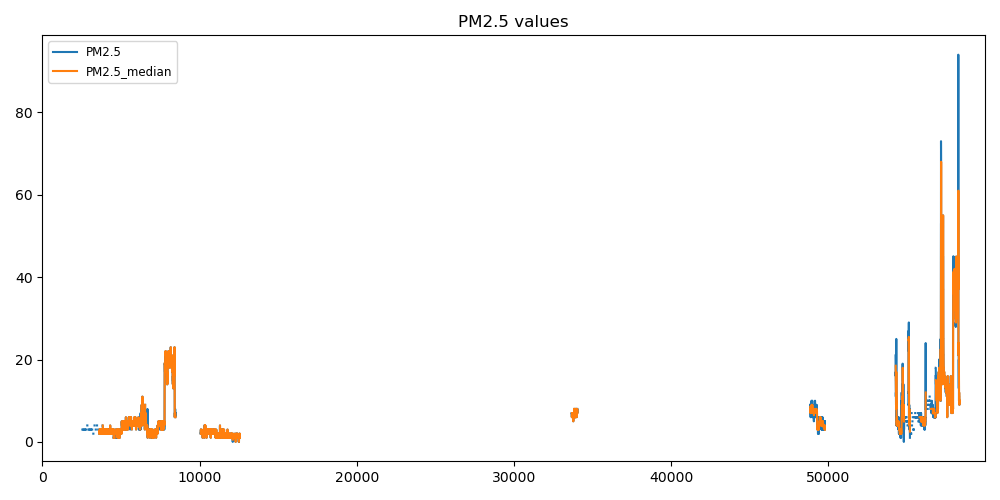

In [62]:
#On plot les valeurs brutes et les valeurs filtrées, c'est à dire la médiane sur une fenêtre mouvante de 10 unités
axPM2 = df_PM2['PM2.5'].plot(figsize=(10, 5), title='PM2.5 values')

#Filtre: on utilise les méthodes .rolling() et .median() des dataframes pandas
df_PM2_roll = df_PM2.rolling(win_len).median()
df_PM2_roll.rename(columns={'PM2.5': 'PM2.5_median'}, inplace=True)
df_PM2_roll['PM2.5_median'].plot()


#On affiche le résultat
axPM2.legend(fontsize=8.5)
plt.tight_layout()
plt.show()

In [63]:
plt.close()

<IPython.core.display.Javascript object>


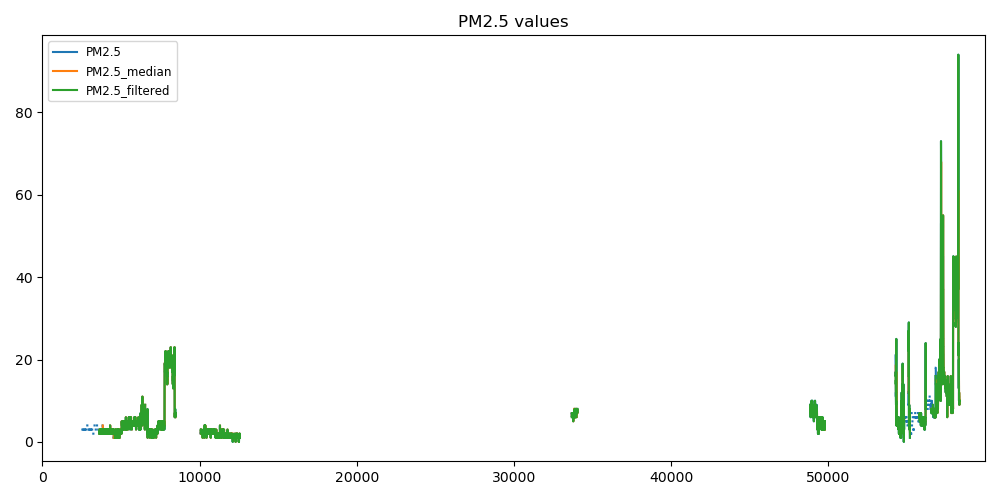

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [64]:
#On plot les valeurs brutes, les valeurs médianes et les valeurs filtrées.
#On commence par récupérer les valeurs précédentes.
axPM2B = df_PM2['PM2.5'].plot(figsize=(10, 5), title='PM2.5 values')

df_PM2_roll['PM2.5_median'].plot()

#On récupère l'écart type sur la même fenêtre roulante dans df_PM2_std
df_PM2_std = df_PM2.rolling(win_len).std()

#On filtre: les valeurs s'éloignant trop de la médiane ne sont pas gardée mais on garde les NaN pour une interpolation future
df_PM2_filtered = df_PM2[(df_PM2['PM2.5'] <= df_PM2_roll['PM2.5_median'] + 3*df_PM2_std['PM2.5']) & (df_PM2['PM2.5'] >= df_PM2_roll['PM2.5_median'] - 3*df_PM2_std['PM2.5']) | pd.isnull(df_PM2['PM2.5'])]
df_PM2_filtered.rename(columns={'PM2.5': 'PM2.5_filtered'}, inplace=True)
df_PM2_filtered['PM2.5_filtered'].plot()

#On récupère les outliers et on les remplace par NaN
df_PM2_outliers = df_PM2[(df_PM2['PM2.5'] > df_PM2_roll['PM2.5_median'] + 3*df_PM2_std['PM2.5']) | (df_PM2['PM2.5'] < df_PM2_roll['PM2.5_median'] - 3*df_PM2_std['PM2.5'])]
df_PM2_outliers.rename(columns={'PM2.5': 'PM2.5_filtered'}, inplace=True)
df_PM2_outliers['PM2.5_filtered'] = np.nan

#On affiche le résultat
axPM2B.legend(fontsize=8.5)
plt.tight_layout()
plt.show()

In [65]:
plt.close()

In [66]:
df_PM2.count()

time     59972
PM2.5    11429
dtype: int64

In [67]:
df_PM2_final = pd.concat([df_PM2_filtered, df_PM2_outliers])

In [68]:
df_PM2_final.count()

time              59299
PM2.5_filtered    10412
dtype: int64

In [69]:
df_PM2_final.to_csv(r'PM2.5_filtered.csv', encoding='utf8', index=False)

#### Rolling median filter sur BC

In [70]:
df_BC = df[['time','BC']]

<IPython.core.display.Javascript object>


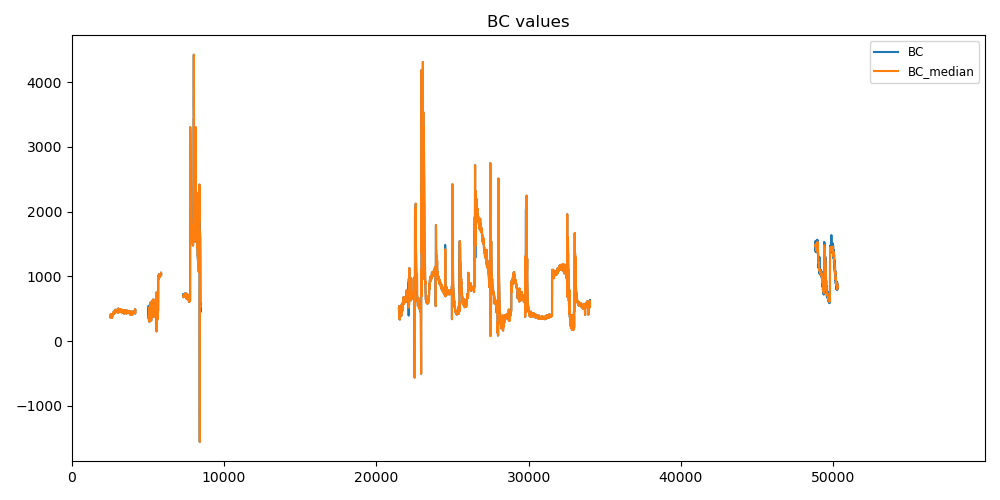

In [71]:
#On plot les valeurs brutes et les valeurs filtrées, c'est à dire la médiane sur une fenêtre mouvante de 10 unités
axBC = df_BC['BC'].plot(figsize=(10, 5), title='BC values')

#Filtre: on utilise les méthodes .rolling() et .median() des dataframes pandas
df_BC_roll = df_BC.rolling(win_len).median()
df_BC_roll.rename(columns={'BC': 'BC_median'}, inplace=True)
df_BC_roll['BC_median'].plot()


#On affiche le résultat
axBC.legend(fontsize=8.5)
plt.tight_layout()
plt.show()

In [72]:
plt.close()

<IPython.core.display.Javascript object>


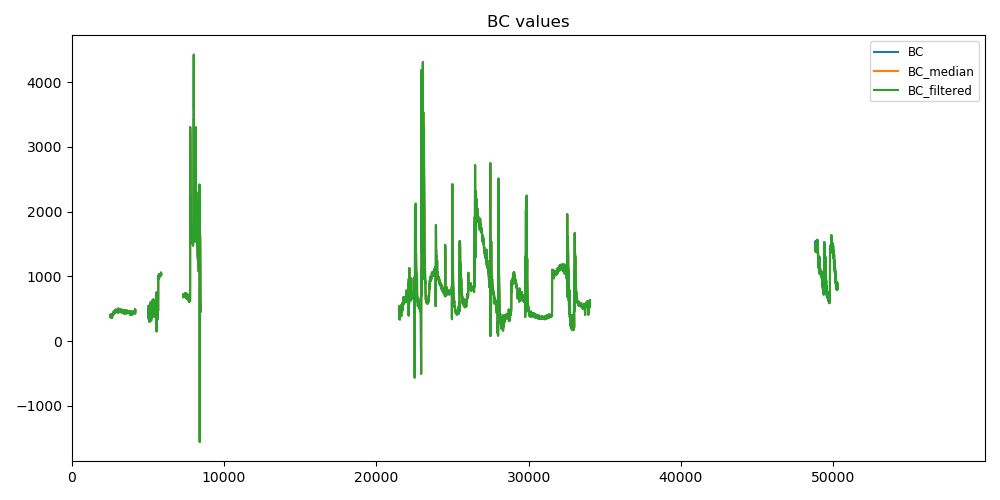

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [73]:
#On plot les valeurs brutes, les valeurs médianes et les valeurs filtrées.
#On commence par récupérer les valeurs précédentes.
axBCB = df_BC['BC'].plot(figsize=(10, 5), title='BC values')

df_BC_roll['BC_median'].plot()

#On récupère l'écart type sur la même fenêtre roulante dans df_PM2_std
df_BC_std = df_BC.rolling(win_len).std()

#On filtre: les valeurs s'éloignant trop de la médiane ne sont pas gardée mais on garde les NaN pour une interpolation future
df_BC_filtered = df_BC[(df_BC.BC <= df_BC_roll.BC_median + 3*df_BC_std.BC) & (df_BC.BC >= df_BC_roll.BC_median - 3*df_BC_std.BC) | pd.isnull(df_BC.BC)]
df_BC_filtered.rename(columns={'BC': 'BC_filtered'}, inplace=True)
df_BC_filtered['BC_filtered'].plot()

#On récupère les outliers et on les remplace par Nan
df_BC_outliers = df_BC[(df_BC.BC > df_BC_roll.BC_median + 3*df_BC_std.BC) | (df_BC.BC < df_BC_roll.BC_median - 3*df_BC_std.BC)]
df_BC_outliers.rename(columns={'BC': 'BC_filtered'}, inplace=True)
df_BC_outliers['BC_filtered'] = np.nan

#On affiche le résultat
axBCB.legend(fontsize=8.5)
plt.tight_layout()
plt.show()

In [74]:
plt.close()

In [75]:
df_BC.count()

time    59972
BC      17631
dtype: int64

In [76]:
df_BC_final = pd.concat([df_BC_filtered, df_BC_outliers])

In [77]:
df_BC_final.count()

time           59927
BC_filtered    17149
dtype: int64

In [78]:
df_BC_final.to_csv(r'BC_filtered.csv', encoding='utf8', index=False)

#### Explications

#Valeurs de NO2

Il y a beaucoup de mesures de NO2 (52007 mesures non nulles sur 59972 mesures).

Néanmoins, on constate qu'il y a proportionnellement peu d'outliers: 1587 seulement d'après notre traitement.

Ainsi, les valeurs de NO2 sont très peu bruitées et semblent plutôt bonnes.

#Valeurs des différents PMx

Pour les différentes valeurs de PMx, il y a le même nombre de mesures non nulles: 11429 sur 59972 mesures, ce qui est peu.

PM2.5 possède le moins d'outliers:  1017 d'après notre méthode.

PM1.0 et PM10 en possèdent tous les deux un peu plus, avec 1034 outliers chacun.

Il y a ainsi beaucoup de bruit dans les mesures des différents PMx.

#Valeurs de BC

Il y a également peu de mesures de BC non nulles: 17631 sur 59972.

Néanmoins, il y a moins d'outliers: 482 d'après notre traitement.

Ainsi, les valeurs de BC sont plus nombreuses que celles des PMx et moins bruitées, mais moins nombreuses et plus bruitées que celles de NO2.

### 4) ARIMA model

#Une série chronologique peut être décomposée en 3 composantes : 
Tendance: mouvement ascendant et descendant des données avec le temps sur une longue période
Saisonnalité: variance saisonnière 
Bruit: pointes et creux à intervalles aléatoires
    
Avant d'appliquer un modèle statistique sur une série chronologique, nous voulons nous assurer qu'il est stationnaire :
	la moyenne des séries ne devrait pas être en fonction du temps
	la variance des séries ne devrait pas être en fonction du temps
	Aussi la covariance ne doit pas être en fonction du temps

Nous allons utiliser la bibliothèque statsmodels fournit une suite de fonctions pour travailler avec des données de séries chronologiques

Comme mentionné précédemment, avant de pouvoir construire un modèle, nous devons nous assurer que la série chronologique est stationnaire. Il existe deux façons principales de déterminer si une série chronologique donnée est stationnaire, et nous avons choisi d’utiliser la suivante :
	Rolling statics : tracez la rolling mean et le rolling écart-type . La série chronologique est stationnaire si elle reste constante dans le temps (à l'œil nu on peut voir si les lignes sont droites et parallèles à l'axe des x).


In [3]:
df = pd.read_csv("data.csv")

In [4]:
df = df.rename({'PM1.0':'PM1'}, axis='columns')
df = df.rename({'PM2.5':'PM2'}, axis='columns')

#### a) PM10:

In [5]:
df_PM10 = df[['time','PM10']]

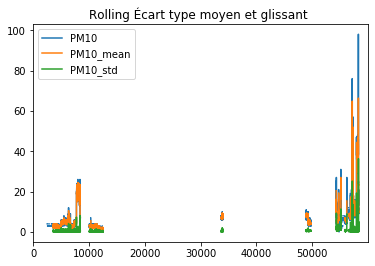

In [6]:
rolling_mean = df_PM10.rolling (window = 12) .mean () 
rolling_std = df_PM10.rolling (window = 12) .std () 
df_PM10['PM10'].plot()
rolling_mean.rename(columns={'PM10': 'PM10_mean'}, inplace=True)
rolling_mean['PM10_mean'].plot()
rolling_std.rename(columns={'PM10': 'PM10_std'}, inplace=True)
rolling_std['PM10_std'].plot()
#plt.plot (df, color = 'blue', label = 'Original') 
#plt.plot ( rolling_mean, color = 'red', label = 'Rolling Mean') 
#plt.plot (rolling_std, color = 'black', label = 'Rolling Std') 
plt.legend (loc = 'best') 
plt.title ('Rolling Écart type moyen et glissant ')
plt.show ()

#### b) PM2:

In [7]:
df_PM2 = df[['time','PM2']]

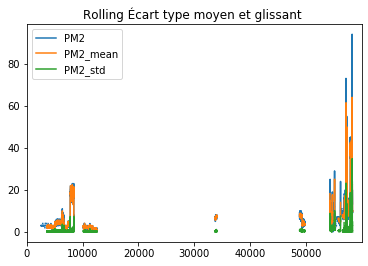

In [8]:
rolling_mean = df_PM2.rolling (window = 12) .mean () 
rolling_std = df_PM2.rolling (window = 12) .std () 
df_PM2['PM2'].plot()
rolling_mean.rename(columns={'PM2': 'PM2_mean'}, inplace=True)
rolling_mean['PM2_mean'].plot()
rolling_std.rename(columns={'PM2': 'PM2_std'}, inplace=True)
rolling_std['PM2_std'].plot()
#plt.plot (df, color = 'blue', label = 'Original') 
#plt.plot ( rolling_mean, color = 'red', label = 'Rolling Mean') 
#plt.plot (rolling_std, color = 'black', label = 'Rolling Std') 
plt.legend (loc = 'best') 
plt.title ('Rolling Écart type moyen et glissant ')
plt.show ()

#### c) PM1:

In [9]:
df_PM1 = df[['time','PM1']]

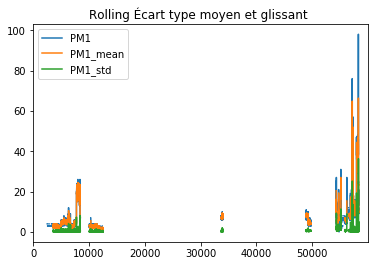

In [10]:
rolling_mean = df_PM1.rolling (window = 12) .mean () 
rolling_std = df_PM1.rolling (window = 12) .std () 
df_PM1['PM1'].plot()
rolling_mean.rename(columns={'PM1': 'PM1_mean'}, inplace=True)
rolling_mean['PM1_mean'].plot()
rolling_std.rename(columns={'PM1': 'PM1_std'}, inplace=True)
rolling_std['PM1_std'].plot()
#plt.plot (df, color = 'blue', label = 'Original') 
#plt.plot ( rolling_mean, color = 'red', label = 'Rolling Mean') 
#plt.plot (rolling_std, color = 'black', label = 'Rolling Std') 
plt.legend (loc = 'best') 
plt.title ('Rolling Écart type moyen et glissant ')
plt.show ()

#### d) NO2:

In [11]:
df_NO2 = df[['time','NO2']]

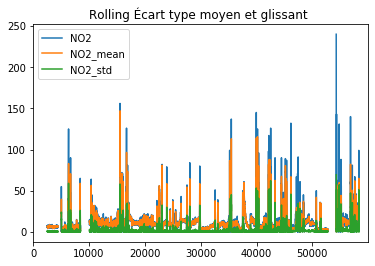

In [12]:
rolling_mean = df_NO2.rolling (window = 12) .mean () 
rolling_std = df_NO2.rolling (window = 12) .std () 
df_NO2['NO2'].plot()
rolling_mean.rename(columns={'NO2': 'NO2_mean'}, inplace=True)
rolling_mean['NO2_mean'].plot()
rolling_std.rename(columns={'NO2': 'NO2_std'}, inplace=True)
rolling_std['NO2_std'].plot()
#plt.plot (df, color = 'blue', label = 'Original') 
#plt.plot ( rolling_mean, color = 'red', label = 'Rolling Mean') 
#plt.plot (rolling_std, color = 'black', label = 'Rolling Std') 
plt.legend (loc = 'best') 
plt.title ('Rolling Écart type moyen et glissant ')
plt.show ()

#### e) BC:

In [13]:
df_BC = df[['time','BC']]

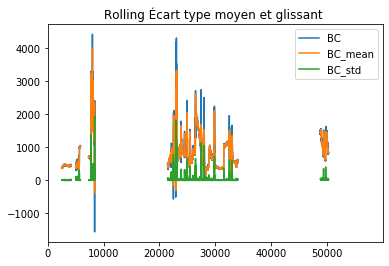

In [14]:
rolling_mean = df_BC.rolling (window = 12) .mean () 
rolling_std = df_BC.rolling (window = 12) .std () 
df_BC['BC'].plot()
rolling_mean.rename(columns={'BC': 'BC_mean'}, inplace=True)
rolling_mean['BC_mean'].plot()
rolling_std.rename(columns={'BC': 'BC_std'}, inplace=True)
rolling_std['BC_std'].plot()
#plt.plot (df, color = 'blue', label = 'Original') 
#plt.plot ( rolling_mean, color = 'red', label = 'Rolling Mean') 
#plt.plot (rolling_std, color = 'black', label = 'Rolling Std') 
plt.legend (loc = 'best') 
plt.title ('Rolling Écart type moyen et glissant ')
plt.show ()

#Comme vous pouvez le voir pour le PM10, la moyenne mobile et l'écart-type roulant augmentent avec le temps. Par conséquent, nous pouvons conclure que la série chronologique n'est pas stationnaire


Prendre le logarithme de la variable dépendante pour réduire la vitesse à laquelle la moyenne mobile augmente.

C:\Users\THOMAS\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


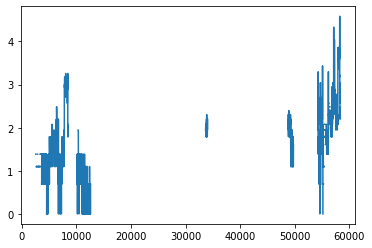

In [15]:
df_logPM10 = np.log(df_PM10['PM10'])
plt.plot(df_logPM10)

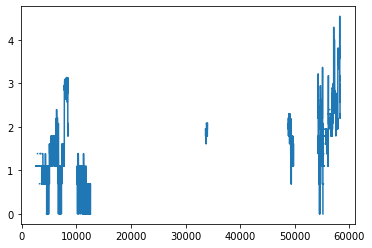

In [16]:
df_logPM2 = np.log(df_PM2['PM2'])
plt.plot(df_logPM2)

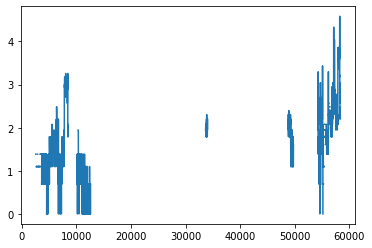

In [17]:
df_logPM1 = np.log(df_PM1['PM1'])
plt.plot(df_logPM1)

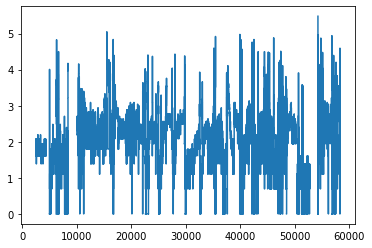

In [18]:
df_logNO2 = np.log(df_NO2['NO2'])
plt.plot(df_logNO2)

C:\Users\THOMAS\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


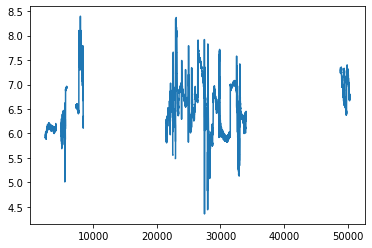

In [19]:
df_logBC = np.log(df_BC['BC'])
plt.plot(df_logBC)

#Créons une fonction pour exécuter le test qui détermine si une série temporelle donnée est stationnaire.

In [20]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

#Il existe plusieurs transformations que nous pouvons appliquer à une série chronologique pour la rendre stationnaire. Par exemple, nous soustrayons la moyenne mobile.

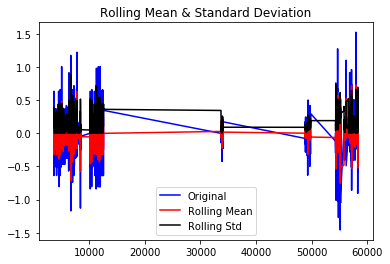

In [21]:
rolling_mean = df_logPM10.rolling(window=12).mean()
df_logPM10_minus_mean = df_logPM10 - rolling_mean
df_logPM10_minus_mean.dropna(inplace=True)
get_stationarity(df_logPM10_minus_mean)

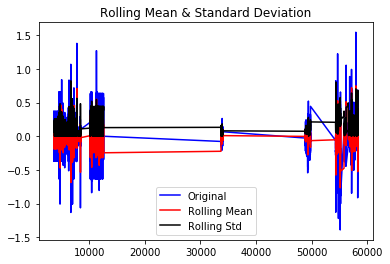

In [22]:
rolling_mean = df_logPM2.rolling(window=12).mean()
df_logPM2_minus_mean = df_logPM2 - rolling_mean
df_logPM2_minus_mean.dropna(inplace=True)
get_stationarity(df_logPM2_minus_mean)

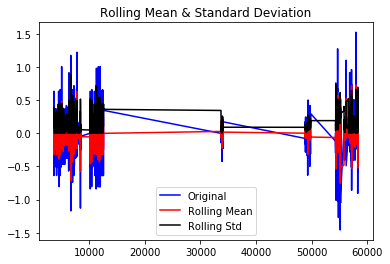

In [23]:
rolling_mean = df_logPM1.rolling(window=12).mean()
df_logPM1_minus_mean = df_logPM1 - rolling_mean
df_logPM1_minus_mean.dropna(inplace=True)
get_stationarity(df_logPM1_minus_mean)

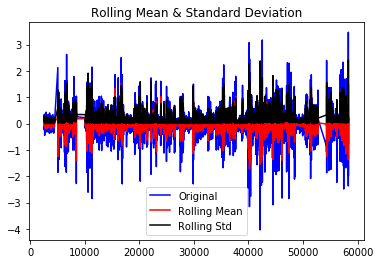

In [24]:
rolling_mean = df_logNO2.rolling(window=12).mean()
df_logNO2_minus_mean = df_logNO2 - rolling_mean
df_logNO2_minus_mean.dropna(inplace=True)
get_stationarity(df_logNO2_minus_mean)

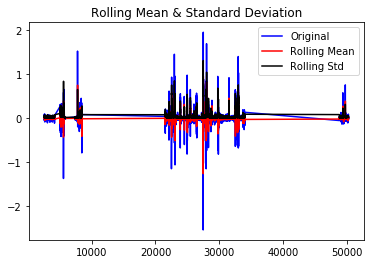

In [25]:
rolling_mean = df_logBC.rolling(window=12).mean()
df_logBC_minus_mean = df_logBC - rolling_mean
df_logBC_minus_mean.dropna(inplace=True)
get_stationarity(df_logBC_minus_mean)

#Comme nous pouvons le voir, après soustraction de la moyenne, la moyenne mobile et l'écart type sont approximativement horizontaux. Par conséquent, la série chronologique est stationnaire.


#L'application de la décroissance exponentielle est une autre façon de transformer une série temporelle telle qu'elle est stationnaire.

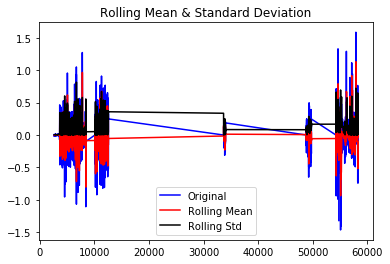

In [26]:
rolling_mean_exp_decay = df_logPM10.ewm (halflife = 12, min_periods = 0, adjust = True) .mean () 
df_logPM10_exp_decay = df_logPM10 - rolling_mean_exp_decay 
df_logPM10_exp_decay.dropna (inplace = True) 
get_stationarity(df_logPM10_exp_decay)

#La décroissance exponentielle a donné de moins bons résultats que la soustraction de la moyenne mobile. Cependant, il est toujours plus stationnaire que l'original.


#Essayons une autre méthode pour déterminer s'il existe une solution encore meilleure. Lors de l'application du décalage horaire, nous soustrayons chaque point par celui qui l'a précédé.

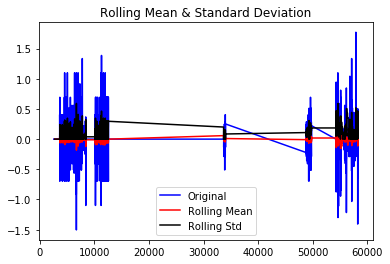

In [27]:
df_logPM10_shift = df_logPM10 - df_logPM10.shift()
df_logPM10_shift.dropna(inplace=True)
get_stationarity(df_logPM10_shift)

#Le décalage temporel a donné de moins bons résultats que la soustraction de la moyenne mobile. Cependant, il est toujours plus stationnaire que l'original.

In [ ]:
# = seasonal_decompose(df_logPM10) 
#model = ARIMA(df_logPM10, order=(2,1,2))
#results = model.fit(disp=-1)
#plt.plot(df_log_shiftPM10)
#plt.plot(results.fittedvalues, color='red')

# II- Correction de valeurs nuls par des interpolations

# III- Modèles de classification sur la colonne activity

# IV- Enrichissement des données